# DBSCAN (Density-Based Spatial Clustering of Application with Noise)

- 밀도(데이터포인트의 간격) 기반 군집 알고리즘


![](https://d.pr/i/Re9qoB+)

![](https://d.pr/i/T3srVy+)

![](https://d.pr/i/tiIr6K+)

**장점**
- 비구형 클러스터 탐지
- 노이즈 데이터 처리
- 비지도 학습 (클러스터 개수를 사전에 알 필요가 없음)

**단점**
- 데이터 밀도가 자주 변하거나 아예 변화지 않으면 군집화 성능 저하
- 특성 개수가 많으면 군집화 성능 저하 (고차원 데이터에서의 밀도 불균형)
- 매개변수 민감성

X shape: (300, 2)


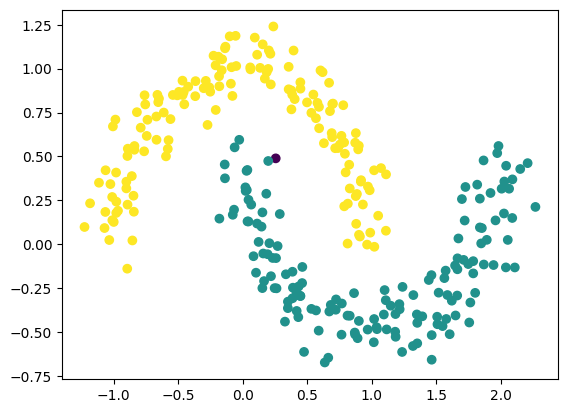

In [5]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# 두 개의 반달모양 데이터를 만듬
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)
print("X shape:", X.shape)

dbscan = DBSCAN(eps=0.2, min_samples=6) # eps(이웃 점의 거리 반지름, 기본 0.5)
                                       # min_samples(minPts, 기본 5)
dbscan.fit(X) # 클러스터링 계산

plt.scatter(X[:,0], X[:,1], c=dbscan.labels_)
plt.show()

In [ ]:
import numpy as np

np.unique(dbscan.labels_, return_counts=True)
# 결과 보면 -1이라는 군집이 안 된 놈이 있음 (원래 본 데이터 라벨 0과 1로 구성)
# 위 plot에서 혼자 보라색인 포인트 = 노이즈 (border point라고...? 물어보기)

(array([-1,  0,  1]), array([  1, 149, 150]))

### Iris 데이터셋에 DBSCAN 적용

In [7]:
from sklearn.datasets import load_iris
import pandas as pd

iris_data = load_iris()

iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['species'] = iris_data.target

In [12]:
# DBSCAN 적용
dbscan = DBSCAN(eps=0.6, min_samples=4)
dbscan.fit_predict(iris_data.data) 
# 얘는 transform과 predict가 없고 fit, fit_predit만 있음 => 왜냐면 얘는 data point간 거리가 중요해 => 새 데이터 포인트 들어가면 군집 결과가 달라짐

iris_df['cluster'] = dbscan.labels_
iris_df.groupby('species')['cluster'].value_counts().reset_index()

,species,cluster,count
0,0,0,49
1,0,-1,1
2,1,1,46
3,1,2,4
4,2,1,46
5,2,-1,4


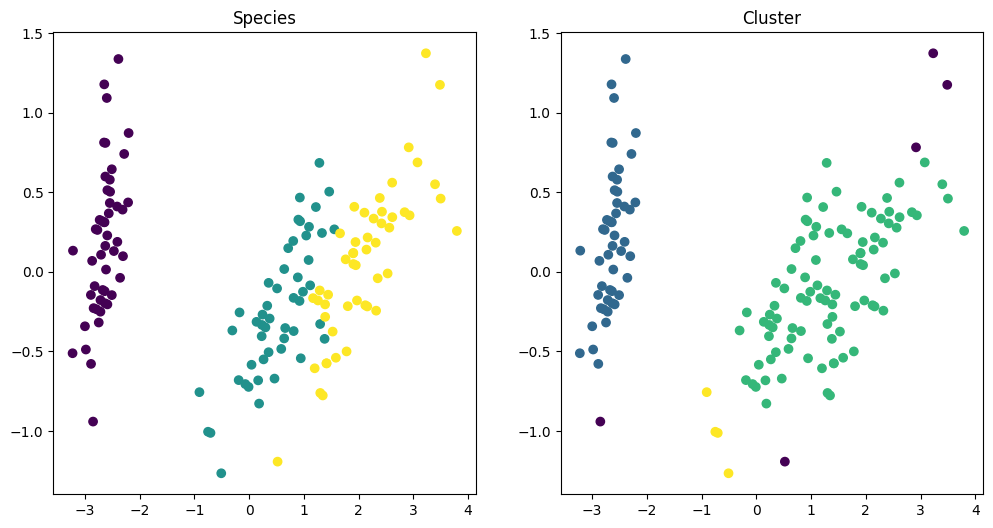

In [14]:
from sklearn.decomposition import PCA

# 시각화를 위한 PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris_data.data)
iris_df['pca1'] = pca_transformed[:,0]
iris_df['pca2'] = pca_transformed[:,1]

# Species(라벨 데이터) 기준 시각화 + cluster(dbscan 군집 데이터) 기준 시각화
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].scatter(x=iris_df['pca1'], y=iris_df['pca2'], c=iris_df['species'])
ax[0].set_title('Species')
ax[1].scatter(x=iris_df['pca1'], y=iris_df['pca2'], c=iris_df['cluster'])
ax[1].set_title('Cluster')

plt.show()

- 오른쪽 보라색들이 노이즈 포인트
- 군집결과 보니까 이 데이터는 K-means clustering이 더 적합